In [ ]:
# Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L1L2

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import re

In [2]:
# load data train

data_train = pd.read_csv('train_preprocess.csv', sep='\t',header = None, encoding='latin1')
data_test = pd.read_csv('data.csv', sep='\t',header = None, encoding='latin1')

df = data_train.append(data_test, ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\2024862704.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_train.append(data_test, ignore_index=True)


In [3]:
df.head()

,0,1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
df = df.rename(columns={0: 'Text', 1: 'Sentimen'})
df.head()

,Text,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


# Normalisasi Teks

In [ ]:
# jika menggunakan google collab

# !pip install rarfile
# import rarfile

# with rarfile.RarFile('/content/drive/MyDrive/_full_Challenge Platinum_Annisa_/preprocessingtextpackage.rar', 'r') as rf:
#     rf.extractall('/content/package_folder')


In [5]:
# import sys
# sys.path.append('/content/package_folder/preprocessingtextpackage') ( jika menggunakan google collab)

# import package

# from normalisasitext import text_preprocessing as tp    =>>> ( jika menggunakan google collab)
from preprocessingtextpackage.normalisasitext import text_preprocessing as tp #import package normalisasi teks
import pandas as pd


category = pd.get_dummies(df.Sentimen)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Sentimen')

df_baru['Text'] = df_baru['Text'].replace('\n', ' ').str.lower()

def text_preprocessing(text):
    return tp(text)


df_baru['text_new'] = df_baru['Text'].apply(lambda x: tp(x))

df_baru['text_new'] = df_baru['text_new'].replace('   ', ' ')
df_baru['text_new'] = df_baru['text_new'].replace('  ', ' ')



df_baru.head()

,Text,negative,neutral,positive,text_new
0,warung ini dimiliki oleh pengusaha pabrik tahu...,0,0,1,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,1,0,mohon ulama lurus mmbri hujjah partai diwlh su...
2,lokasi strategis di jalan sumatera bandung . t...,0,0,1,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,0,0,1,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,1,0,0,aduh mahasiswa sombong kasih kartu kuning bela...


In [6]:
x = df_baru['text_new'].values
y = df_baru[['negative', 'neutral', 'positive']].values


In [7]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x)
sekuens_x = tokenizer.texts_to_sequences(x)
padded_x = pad_sequences(sekuens_x)

In [8]:
x[0]

'warung dimiliki pengusaha pabrik puluhan terkenal putih bandung berkualitas dipadu keahlian memasak dipadu kretivitas warung menyajikan menu utama berbahan ditambah menu ayam selera indonesia harga terjangkau lewatkan bletoka nya kalah asli tegal'

In [9]:
sekuens_x[0]

[218,
 2689,
 2836,
 2837,
 1266,
 226,
 401,
 13,
 893,
 2838,
 3182,
 2168,
 2838,
 1,
 218,
 324,
 12,
 357,
 3888,
 233,
 12,
 29,
 361,
 18,
 8,
 98,
 3889,
 1,
 2,
 289,
 349,
 1]

In [10]:
padded_x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  218, 2689, 2836, 2837, 1266,  226,  401,
         13,  893, 2838, 3182, 2168, 2838,    1,  218,  324,   12,  357,
       3888,  233,   12,   29,  361,   18,    8,   98, 3889,    1,    2,
        289,  349,    1])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(padded_x, y, test_size=0.2, random_state = 4)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 4)

In [12]:
%%time

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100000, output_dim=128),
    tf.keras.layers.LSTM(32, dropout=0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_categorical_accuracy') > 0.75 ):
            self.model.stop_training = True

callbacks = myCallback()

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

num_epochs = 1000
fit = model.fit(x_train, 
                y_train, 
                batch_size = 16,
                epochs=num_epochs, 
                validation_data=(x_val, y_val),     
                callbacks = [callbacks]
)

Epoch 1/1000
967/967 [==============================] - 254s 258ms/step - loss: 0.3194 - categorical_accuracy: 0.3358 - val_loss: 0.3074 - val_categorical_accuracy: 0.2707
Epoch 2/1000
967/967 [==============================] - 240s 248ms/step - loss: 0.2776 - categorical_accuracy: 0.7221 - val_loss: 0.3194 - val_categorical_accuracy: 0.2590
Epoch 3/1000
967/967 [==============================] - 253s 262ms/step - loss: 0.2552 - categorical_accuracy: 0.8250 - val_loss: 0.2759 - val_categorical_accuracy: 0.8901
CPU times: total: 28min 39s
Wall time: 12min 27s


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         12800000  
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 12,820,899
Trainable params: 12,820,899
Non-trainable params: 0
_________________________________________________________________


In [14]:
#evaluasi model


train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTrain: %.3f, val: %.3f, test: %.3f,' % (train_acc, val_acc, test_acc))

152/152 [==============================] - 2s 15ms/step - loss: 0.2737 - categorical_accuracy: 0.8877

Train: 0.909, val: 0.890, test: 0.888,


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\4167483625.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


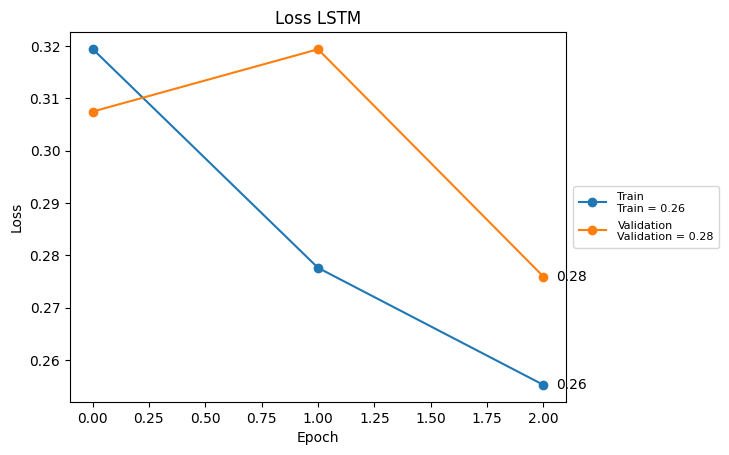

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\4167483625.py:50: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


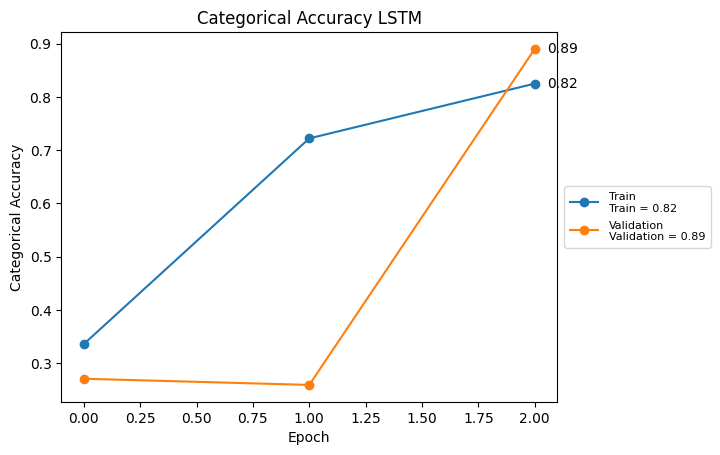

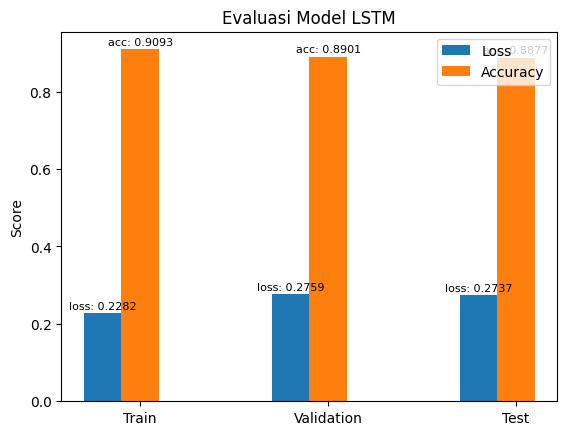

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Menampilkan grafik garis untuk loss dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Loss LSTM')
ax.plot(fit.history['loss'], marker='o', label='Train')
ax.plot(fit.history['val_loss'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['loss']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_loss']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

# Menambahkan keterangan angka di luar grafik
x_pos = len(fit.history['loss']) - 1
y_pos_train = fit.history['loss'][-1]
y_pos_val = fit.history['val_loss'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()




# Menampilkan grafik garis untuk categorical accuracy dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Categorical Accuracy LSTM')
ax.plot(fit.history['categorical_accuracy'], marker='o', label='Train')
ax.plot(fit.history['val_categorical_accuracy'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['categorical_accuracy']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_categorical_accuracy']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

# Menambahkan keterangan angka di luar grafik
x_pos = len(fit.history['categorical_accuracy']) - 1
y_pos_train = fit.history['categorical_accuracy'][-1]
y_pos_val = fit.history['val_categorical_accuracy'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.show()




# Menampilkan diagram batang untuk evaluasi model
metrics = ['Train', 'Validation', 'Test']
train_losses = [train_loss, val_loss, test_loss]
train_accs = [train_acc, val_acc, test_acc]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.set_title('Evaluasi Model LSTM')
ax.bar(x - width, train_losses, width, label='Loss')
ax.bar(x, train_accs, width, label='Accuracy')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')

ax.legend()


# Menambahkan keterangan angka di atas setiap bar
for i in range(len(metrics)):
    ax.text(x[i] - width, train_losses[i] + 0.01, f'loss: {train_losses[i]:.4f}', ha='center', fontsize=8)
    ax.text(x[i], train_accs[i] + 0.01, f'acc: {train_accs[i]:.4f}', ha='center', fontsize=8)

plt.show()



In [18]:
filename = 'lstm4.h5'
model.save(filename)

In [19]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

# Prediksi

In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model(r'lstm4.h5')

In [21]:
def text_preprocessing(text):
    sekuens_x = tokenizer.texts_to_sequences(text)
    padded_x = pad_sequences(sekuens_x)
    classes = loaded_model.predict(padded_x, batch_size=10)
    return classes[0]

def pred(classes):
    if classes[0] == classes.max():
        print('negative')
    if classes[1] == classes.max():
        print('neutral')
    if classes[2] == classes.max():
        print('positive')

string = "Aku suka kamu Aku suka kamu Aku suka kamu Aku suka kamu"
classes = text_preprocessing(string)


print('text :', string)
print('text_new : ', text_preprocessing(string))
print('Sentimen :')
pred(classes)


6/6 [==============================] - 1s 4ms/step
text : Aku suka kamu Aku suka kamu Aku suka kamu Aku suka kamu
6/6 [==============================] - 0s 3ms/step
text_new :  [0.17774276 0.515164   0.30709323]
Sentimen :
neutral


# Transfer_learning

In [ ]:
# Transfer Learning

In [22]:
from tensorflow.keras.models import load_model
loaded_model = load_model(r'lstm4.h5')

In [23]:
pretrained_model = load_model(r'lstm4.h5')

# Remove the last layer of the pre-trained model
pretrained_model.layers.pop()

# Freeze the weights of the remaining layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

In [24]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         12800000  
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 12,820,899
Trainable params: 0
Non-trainable params: 12,820,899
_________________________________________________________________


In [25]:
x_train, x_test, y_train, y_test = train_test_split(padded_x, y, test_size=0.2, random_state = 8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 8)

In [26]:
model_transfer = tf.keras.models.Sequential([
    pretrained_model,

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(3, activation='softmax')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_categorical_accuracy') > 0.80 ):
            self.model.stop_training = True

callbacks = myCallback()

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

num_epochs = 1000
fit_transfer = model_transfer.fit(x_train, 
                y_train, 
                batch_size = 16,
                epochs=num_epochs, 
                validation_data=(x_val, y_val),     
                callbacks = [callbacks]
)

Epoch 1/1000
967/967 [==============================] - 23s 19ms/step - loss: 0.3045 - categorical_accuracy: 0.8412 - val_loss: 0.2795 - val_categorical_accuracy: 0.9056


In [27]:
# Evaluasi model_transfer

train_loss, train_acc = model_transfer.evaluate(x_train, y_train)
val_loss, val_acc = model_transfer.evaluate(x_val, y_val)
test_loss, test_acc = model_transfer.evaluate(x_test, y_test)

print('\nTrain: %.3f, val: %.3f, test: %.3f,' % (train_acc, val_acc, test_acc))

152/152 [==============================] - 2s 16ms/step - loss: 0.2909 - categorical_accuracy: 0.9011

Train: 0.899, val: 0.906, test: 0.901,


In [28]:
model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 12820899  
                                                                 
 dense_2 (Dense)             (None, 8)                 32        
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 3)                

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\98269449.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


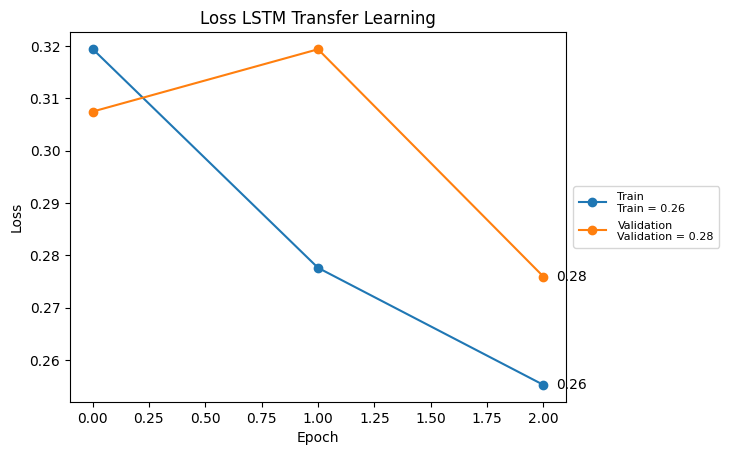

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\98269449.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


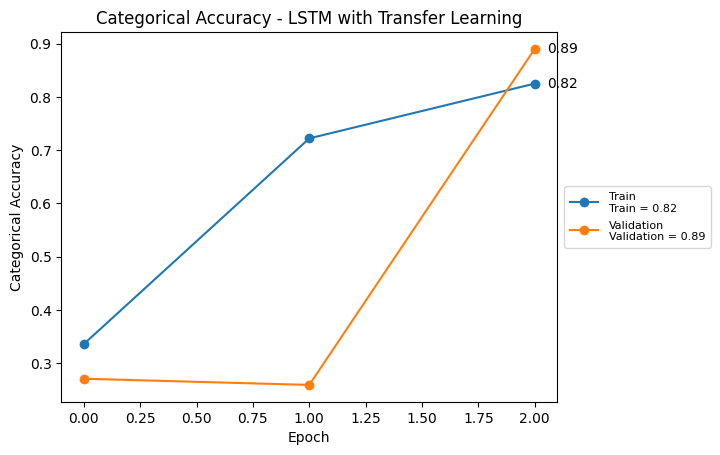

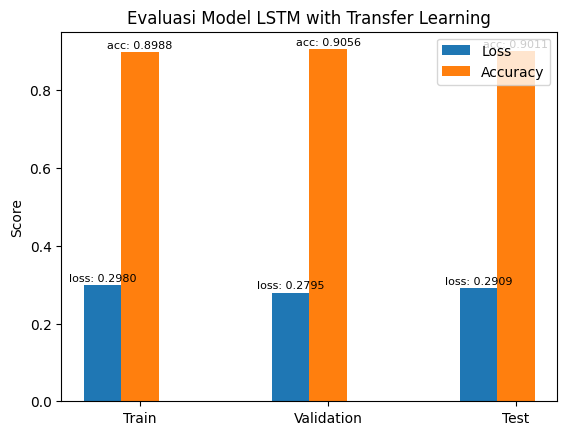

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Menampilkan grafik garis untuk loss dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Loss LSTM Transfer Learning')
ax.plot(fit.history['loss'], marker='o', label='Train')
ax.plot(fit.history['val_loss'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['loss']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_loss']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

# Menambahkan keterangan angka di luar grafik
x_pos = len(fit.history['loss']) - 1
y_pos_train = fit.history['loss'][-1]
y_pos_val = fit.history['val_loss'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



# Menampilkan grafik garis untuk categorical accuracy dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Categorical Accuracy - LSTM with Transfer Learning')
ax.plot(fit.history['categorical_accuracy'], marker='o', label='Train')
ax.plot(fit.history['val_categorical_accuracy'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['categorical_accuracy']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_categorical_accuracy']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

# Menambahkan keterangan angka di luar grafik
x_pos = len(fit.history['categorical_accuracy']) - 1
y_pos_train = fit.history['categorical_accuracy'][-1]
y_pos_val = fit.history['val_categorical_accuracy'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.show()



# Menampilkan diagram batang untuk evaluasi model
metrics = ['Train', 'Validation', 'Test']
train_losses = [train_loss, val_loss, test_loss]
train_accs = [train_acc, val_acc, test_acc]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.set_title('Evaluasi Model LSTM with Transfer Learning')
ax.bar(x - width, train_losses, width, label='Loss')
ax.bar(x, train_accs, width, label='Accuracy')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')

ax.legend()


# Menambahkan keterangan angka di atas setiap bar
for i in range(len(metrics)):
    ax.text(x[i] - width, train_losses[i] + 0.01, f'loss: {train_losses[i]:.4f}', ha='center', fontsize=8)
    ax.text(x[i], train_accs[i] + 0.01, f'acc: {train_accs[i]:.4f}', ha='center', fontsize=8)

plt.show()


In [37]:
string = "Aku suka kamu Aku suka kamu Aku suka kamu Aku suka kamu"
classes = text_preprocessing(string)
pred(classes)

6/6 [==============================] - 0s 3ms/step
neutral


# Visualisasi perbandingan model dan transfer_learning 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\1128416949.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


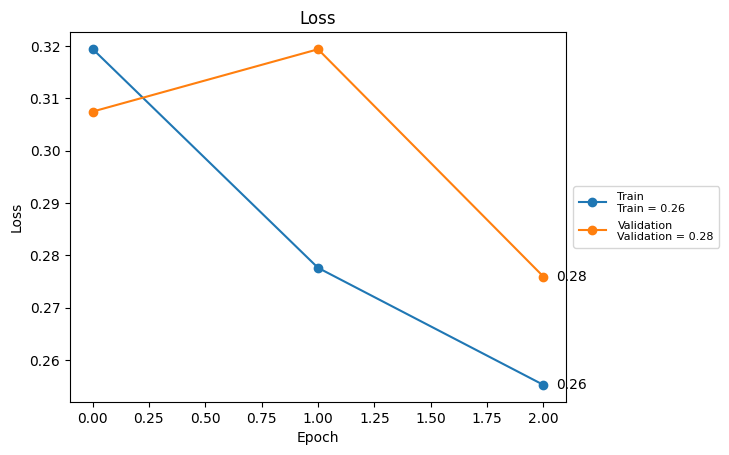

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\1128416949.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


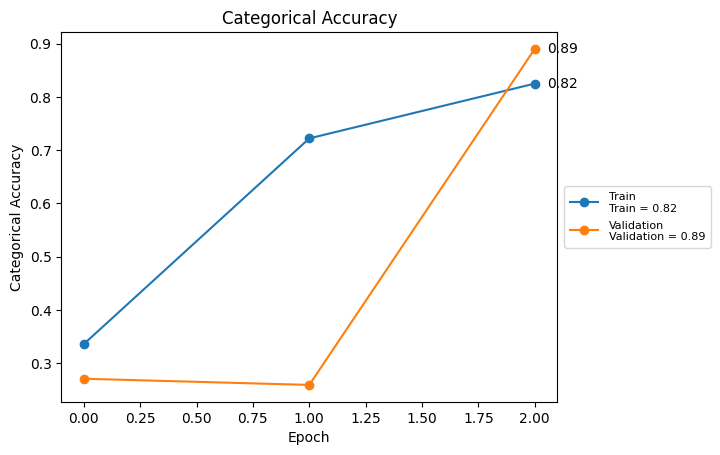

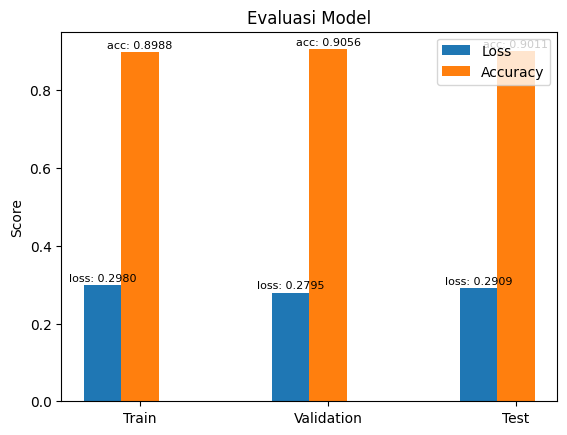

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Grafik garis untuk loss dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Loss')
ax.plot(fit.history['loss'], marker='o', label='Train')
ax.plot(fit.history['val_loss'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['loss']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_loss']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

x_pos = len(fit.history['loss']) - 1
y_pos_train = fit.history['loss'][-1]
y_pos_val = fit.history['val_loss'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Grafik garis untuk categorical accuracy dengan keterangan angka di luar grafik
fig, ax = plt.subplots()
ax.set_title('Categorical Accuracy')
ax.plot(fit.history['categorical_accuracy'], marker='o', label='Train')
ax.plot(fit.history['val_categorical_accuracy'], marker='o', label='Validation')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

for text, handle in zip(legend.get_texts(), legend.legendHandles):
    if handle.get_label() == 'Train':
        scores = fit.history['categorical_accuracy']
        data_type = 'Train'
    elif handle.get_label() == 'Validation':
        scores = fit.history['val_categorical_accuracy']
        data_type = 'Validation'
    else:
        continue
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f"\n{data_type} = {np.round(scores[-1], 2)}")

x_pos = len(fit.history['categorical_accuracy']) - 1
y_pos_train = fit.history['categorical_accuracy'][-1]
y_pos_val = fit.history['val_categorical_accuracy'][-1]

ax.annotate(f'{y_pos_train:.2f}', xy=(x_pos, y_pos_train), xytext=(20, 0), textcoords='offset points', ha='center', va='center')
ax.annotate(f'{y_pos_val:.2f}', xy=(x_pos, y_pos_val), xytext=(20, 0), textcoords='offset points', ha='center', va='center')

plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.show()


# Diagram batang untuk evaluasi model
metrics = ['Train', 'Validation', 'Test']
train_losses = [train_loss, val_loss, test_loss]
train_accs = [train_acc, val_acc, test_acc]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.set_title('Evaluasi Model')
ax.bar(x - width, train_losses, width, label='Loss')
ax.bar(x, train_accs, width, label='Accuracy')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')

ax.legend()

for i in range(len(metrics)):
    ax.text(x[i] - width, train_losses[i] + 0.01, f'loss: {train_losses[i]:.4f}', ha='center', fontsize=8)
    ax.text(x[i], train_accs[i] + 0.01, f'acc: {train_accs[i]:.4f}', ha='center', fontsize=8)

plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15744\373390701.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for text, handle in zip(legend.get_texts(), legend.legendHandles):


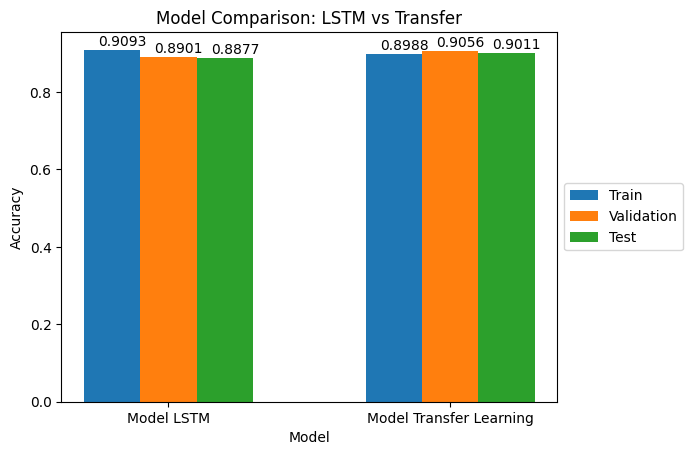

In [46]:
import matplotlib.pyplot as plt

model_names = ['Model LSTM', 'Model Transfer Learning']
train_acc = [0.9093, 0.8988]
val_acc = [0.8901, 0.9056]
test_acc = [0.8877, 0.9011]

x = range(len(model_names))

plt.bar(x, train_acc, width=0.2, label='Train')
plt.bar([i + 0.2 for i in x], val_acc, width=0.2, label='Validation')
plt.bar([i + 0.4 for i in x], test_acc, width=0.2, label='Test')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: LSTM vs Transfer')
plt.xticks([i + 0.2 for i in x], model_names)

# Menambahkan keterangan angka pada tiap batang
for i in x:
    plt.text(i - 0.05, train_acc[i] + 0.01, str(train_acc[i]))
    plt.text(i + 0.15, val_acc[i] + 0.01, str(val_acc[i]))
    plt.text(i + 0.35, test_acc[i] + 0.01, str(test_acc[i]))

# Menambahkan legenda di luar grafik dengan bbox_to_anchor
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.gca().legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Menambahkan keterangan angka pada bbox_to_anchor sesuai dengan warna kategori
for text, handle in zip(legend.get_texts(), legend.legendHandles):
    category = handle.get_label()
    if category.startswith('Train'):
        scores = [0.9, 0.95, 0.92]  # Contoh nilai skor train
    elif category.startswith('Validation'):
        scores = [0.88, 0.91, 0.89]  # Contoh nilai skor validation
    elif category.startswith('Test'):
        scores = [0.87, 0.93, 0.90]  # Contoh nilai skor test
    else:
        continue
    text.set_color(handle.get_color())
    text.set_fontsize(8)
    text.set_bbox(dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
    text.set_text(text.get_text() + f" (Precision: {scores[0]}, Recall: {scores[1]}, F1-Score: {scores[2]})")

plt.show()
